In [1]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error
import statsmodels as sm
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [32]:
sales=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Advertising.csv")
sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
#drop unnamed data i.enominal no role in model building
sales.drop(columns='Unnamed: 0',axis=1,inplace=True)
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
#describe method to see data mean medain mode std etc
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


TV have 85 std, radio have 14 std, newspaper have 21 std for more we will plot distplot to see outliers

In [35]:
print(sales.shape,sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
(200, 4) None


In [36]:
sales.isna().sum()  # so no null values all okey

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

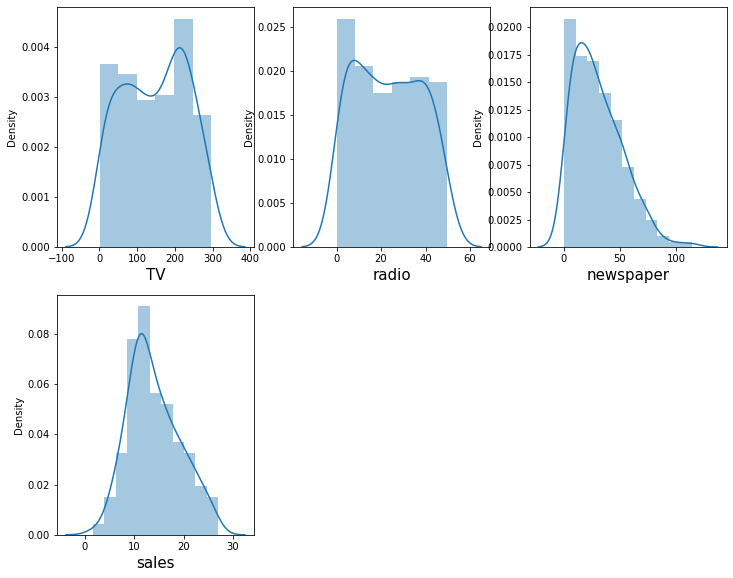

In [37]:
#visualize data distribution and check skewness
plt.figure(figsize=(12,15))
plotnumber=1
for column in sales:
    if plotnumber<=4:
        ax=plt.subplot(3,3 ,plotnumber)
        sns.distplot(sales[column])
        plt.xlabel(column,fontsize=15)
        plotnumber+=1
    
plt.show()

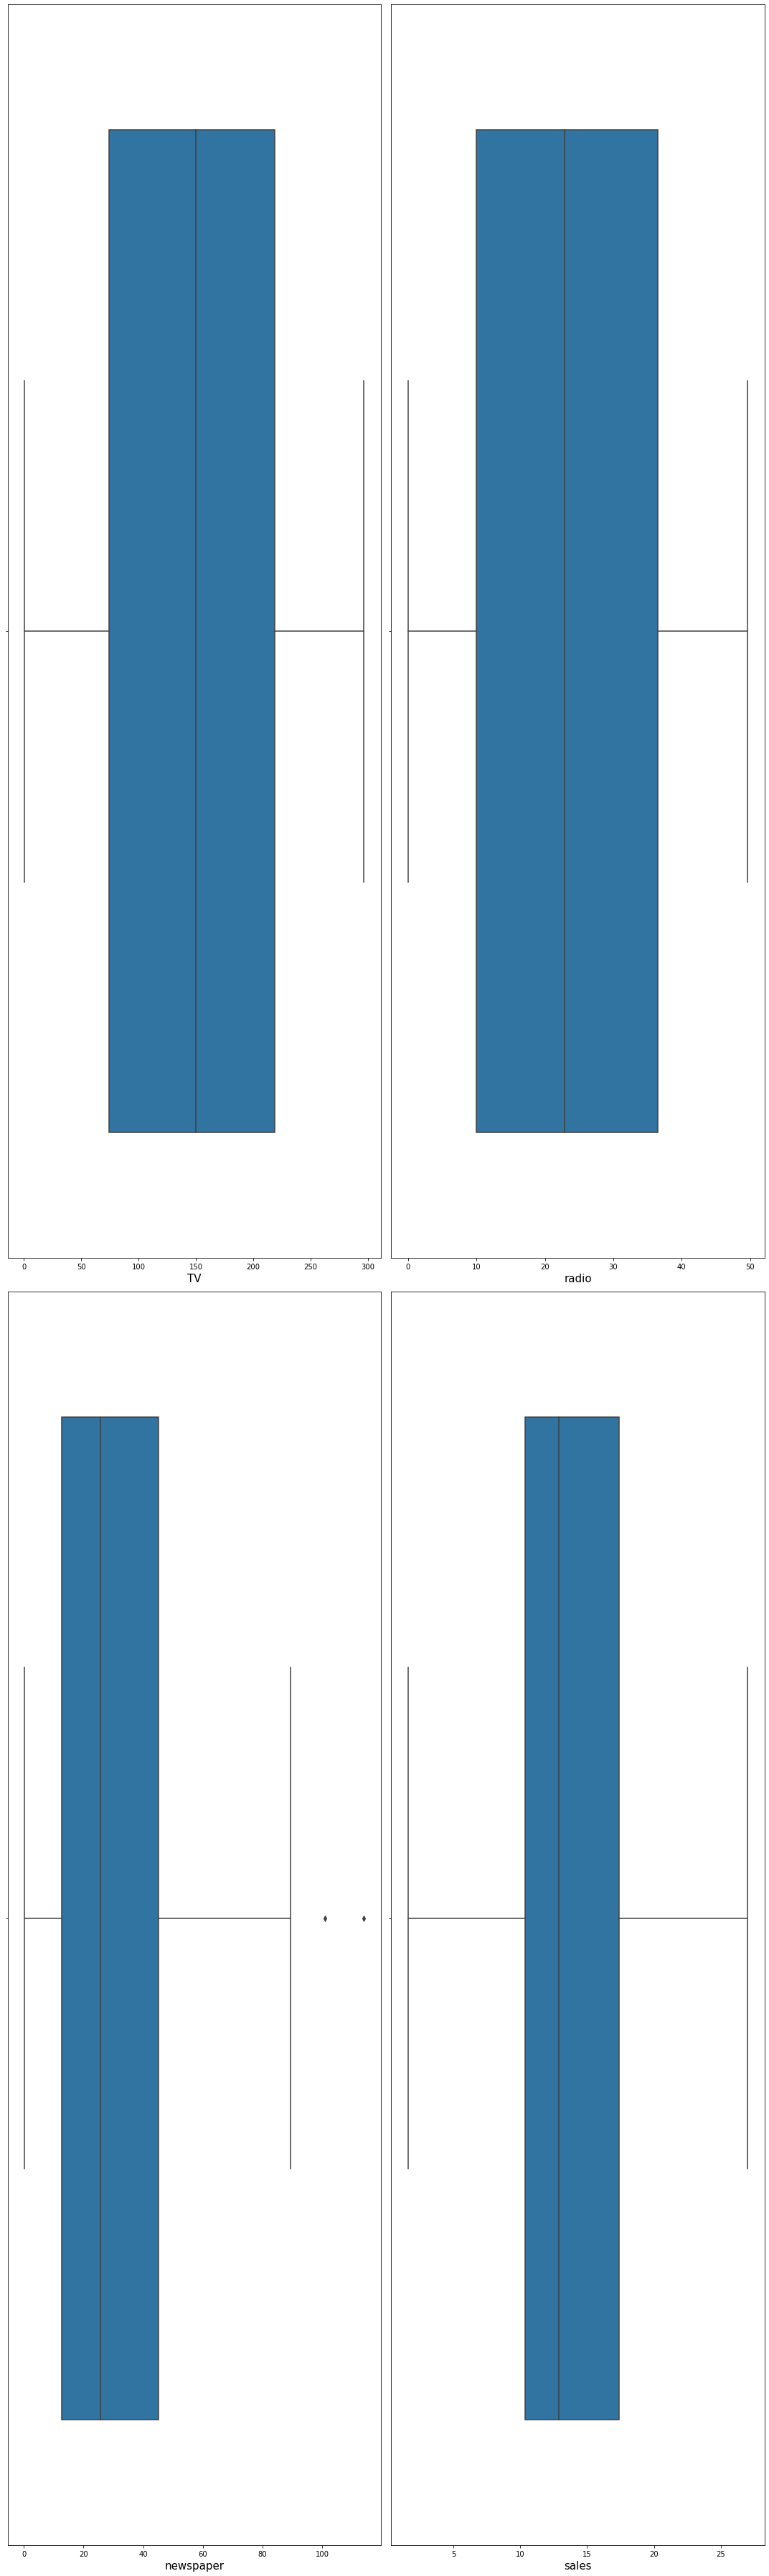

In [38]:
#lest do with boxplot for outlier detection
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in sales:
    if graph<=4:
        ax=plt.subplot(2,2,graph)
        ax=sns.boxplot(sales[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

there is no such considerable outliers in dataset,so lets proceed further to check multicolliniarity

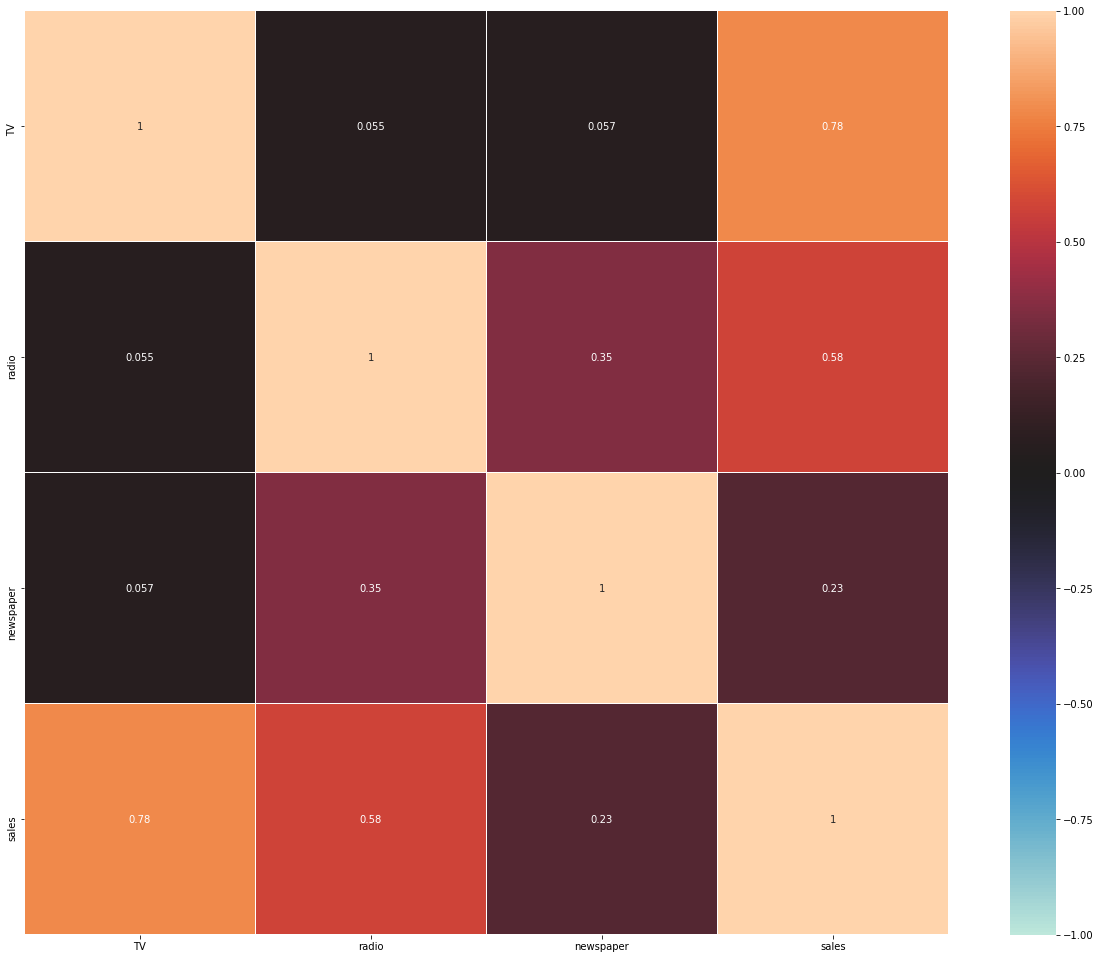

In [39]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=sales.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

In [40]:
corr_matrix=sales.corr()
corr_matrix['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

<AxesSubplot:xlabel='TV', ylabel='radio'>

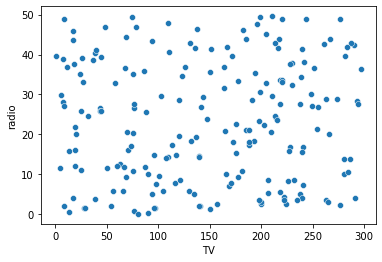

In [41]:
#lets plot scatter plot to see realtion bewteen TV and Radio
sns.scatterplot(x='TV',y='radio',data=sales)

<AxesSubplot:xlabel='radio', ylabel='newspaper'>

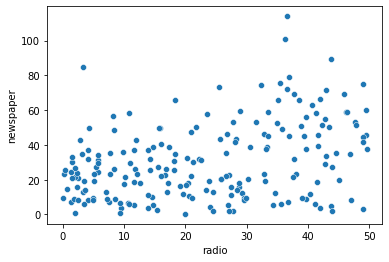

In [42]:
sns.scatterplot(x='radio',y='newspaper',data=sales)

ok so as per scatter plot its clear no such strong linear realtion between features ,so no multicolliniarity 

now we we can proceed to build model before that seprate dataset in features and label and do traintestsplit

In [43]:
#seprate features and label
X=sales.drop(columns='sales',axis=1)
Y=sales.sales

In [44]:
#scale the features data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.25,random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
lr.score(x_train,y_train)

0.9238935852366272

In [60]:
y_pred=lr.predict(x_test)

In [61]:
mean_absolute_error(y_test,y_pred)

1.7869454256210335

In [62]:
mean_squared_error(y_test,y_pred)

6.12957752813618

oh so error is quite high lets do regularization of model and see what can i do

# Hyperparameter Tuning of LR

In [64]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [65]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)# aplha is learning rate ,max_iter means how many time appear in 
lassocv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [67]:
alpha=lassocv.alpha_
alpha

0.0046279119024330555

In [68]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0046279119024330555)

In [70]:
lasso_reg.score(x_test,y_test)

0.8678523655410586

In [71]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [72]:
ridgecv.alpha_

0.001

In [74]:
ridge_l1=Ridge(alpha=ridgecv.alpha_)
ridge_l1.fit(x_train,y_train)

Ridge(alpha=0.001)

In [75]:
ridge_l1.score(x_test,y_test)

0.8366834116789592

In [76]:
#lets try with Adaboost and build the model
from sklearn.ensemble import AdaBoostRegressor

In [77]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [78]:
#model prediction on train data
y_pred=ada.predict(x_train)

In [79]:
print('R square score',r2_score(y_train,y_pred))

R square score 0.9764097144113332


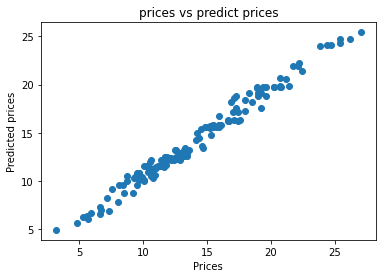

In [80]:
#plotting actual vs predicted with scatter plot to vizualize 
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('prices vs predict prices')
plt.show()

In [81]:
#this following a trend with actual vs pridicted as linear increasing 

#predicting test data with model
y_test_pred=ada.predict(x_test)

In [82]:
#model evaluation
accuracy= r2_score(y_test,y_test_pred)
print('R square score:', accuracy)

R square score: 0.9677209143320801


# HYper parameter tuning with randomizedsearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.tree import DecisionTreeRegressor

In [84]:
params={'n_estimators':[40,47,49,50],'learning_rate':[0.3,.4,.45]}

In [86]:
rnd_search=RandomizedSearchCV(estimator=ada,param_distributions=params,cv=5)

In [87]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [88]:
rnd_search.best_estimator_

AdaBoostRegressor(learning_rate=0.45, n_estimators=49)

In [89]:
ada=AdaBoostRegressor(base_estimator=ada,learning_rate=0.45,n_estimators=49)

In [90]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=AdaBoostRegressor(), learning_rate=0.45,
                  n_estimators=49)

In [91]:
y_pred=ada.predict(x_test)

In [92]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.9716880852405236


In [93]:
#model saving
import pickle
file='Adaboost_model'
pickle.dump(ada,open(file,'wb'))